## **PyOP** - [Python Outlier Detection](https://pyod.readthedocs.io/en/latest/)

- scaleable Python toolkit for **detecting outlying objects** in multivariate data. 
- ~30 algorithms
- **supervised** and **unsupervised**
- Summary in paper form available [here](https://www.jmlr.org/papers/volume20/19-011/19-011.pdf)


## List of available algorithms

| Look At |  Type | Abbr |  Algorithm | Year | Source |
|---------|-------|------|------------|------|--------|
|&#9745; | Linear Model | PCA | Principal Component Analysis (the sum of weighted projected distances to the eigenvector hyperplanes) | 2003 |[Shyu 2003](https://homepages.laas.fr/owe/METROSEC/DOC/FDM03.pdf)|
|&#9745; | Linear Model | MCD | Minimum Covariance Determinant (use the mahalanobis distances as the outlier scores) |  1999 | [Hardin 2002](https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.649.9483&rep=rep1&type=pdf) | 
|&#9744; | Linear Model | OCSVM |  One-Class Support Vector Machines | 2001 |
|&#9744; | Linear Model | LMDD | Deviation-based Outlier Detection (LMDD) | 1996 | 
|&#9744; | Proximity-Based | LOF | Local Outlier Factor | 2000 |  
|&#9744; | Proximity-Based | COF |Connectivity-Based Outlier Factor |2002|    
|&#9744; | Proximity-Based | CBLOF |Clustering-Based Local Outlier Factor | 2003 | 
|&#9744; | Proximity-Based | LOCI | LOCI: Fast outlier detection using the local correlation integral | 2003 | 
|&#9745; | Proximity-Based | HBOS | Histogram-based Outlier Score | 2012 | [Goldstein 2012](https://www.dfki.de/fileadmin/user_upload/import/6431_HBOS-KI-2012.pdf)|
|&#9745; | Proximity-Based | kNN | k Nearest Neighbors (use the distance to the kth nearest neighbor as the outlier score | 2000 | [Ramaswamy 2000](https://webdocs.cs.ualberta.ca/~zaiane/pub/check/ramaswamy.pdf) | 
|&#9745; | Proximity-Based | AvgKNN  | Average kNN (use the average distance to k nearest neighbors as the outlier score) | 2002 | [Ramaswamy 2000](https://webdocs.cs.ualberta.ca/~zaiane/pub/check/ramaswamy.pdf) | 
|&#9745; | Proximity-Based | MedKNN | Median kNN (use the median distance to k nearest neighbors as the outlier score) | 2002 | [Ramaswamy 2000](https://webdocs.cs.ualberta.ca/~zaiane/pub/check/ramaswamy.pdf) |
|&#9744; | Proximity-Based | SOD | Subspace Outlier Detection | 2009 | 
|&#9744; | Proximity-Based | ROD  | Rotation-based Outlier Detection |  2020 | 
|&#9744; | Probabilistic  | ABOD | Angle-Based Outlier Detection |2008 | 
|&#9744; | Probabilistic  | FastABOD | Fast Angle-Based Outlier Detection using approximation | 2008 | 
|&#9744; | Probabilistic  | COPOD | COPOD: Copula-Based Outlier Detection  | 2020  | 
|&#9744; | Probabilistic  | MAD | Median Absolute Deviation (MAD) |1993 |   
|&#9744; | Probabilistic  | SOS | Stochastic Outlier Selection |2012 | 
|&#9745; | Outlier Ensembles | IForest | Isolation Forest | 2008 | [Lia 2008](https://cs.nju.edu.cn/zhouzh/zhouzh.files/publication/icdm08b.pdf?q=isolation-forest)
|&#9744; | Outlier Ensembles |  | Feature Bagging |2005 | 
|&#9744; | Outlier Ensembles  |  LSCP | LSCP: Locally Selective Combination of Parallel Outlier Ensembles  | 2019 |
|&#9744; | Outlier Ensembles  |  XGBOD | Extreme Boosting Based Outlier Detection (Supervised) |  2018 |
|&#9744; | Outlier Ensembles  |  LODA  | Lightweight On-line Detector of Anomalies | 2016 |
|&#9744; | Outlier Ensembles  |  LODA  | Lightweight On-line Detector of Anomalies | 2016 |   
|&#9745; | Neural Networks   |  AutoEncoder | Fully connected AutoEncoder (use reconstruction error as the outlier score) | 2015 | [Aggarwal 2015](https://rd.springer.com/book/10.1007/978-3-319-47578-3)
|&#9745; | Neural Networks  |    VAE | Variational AutoEncoder (use reconstruction error as the outlier score) | 2013 | [Kingma 2013](https://arxiv.org/pdf/1312.6114.pdf)
|&#9744; | Neural Networks  |    Beta-VAE | Variational AutoEncoder (all customized loss term by varying gamma and capacity) | 2018 |
|&#9744; | Neural Networks  |    SO_GAAL | Single-Objective Generative Adversarial Active Learning | 2019 |   
|&#9744; | Neural Networks  |    MO_GAAL | Multiple-Objective Generative Adversarial Active Learning | 2019 |   

#### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyod.utils.data import generate_data

#### Data generation for low dimensional example

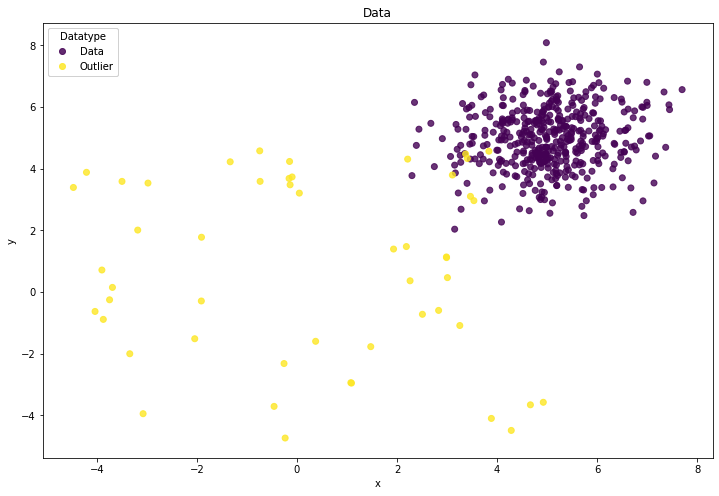

In [27]:
contamination = 0.1 # percentage of outliers
n_train = 500       # number of training points
n_test = 500        # number of testing points
n_features = 2      # number of features
X_train, X_test, ytrain, y_test = generate_data(n_train=n_train, n_test=n_test, 
                                                n_features=n_features, contamination=contamination,
                                                random_state=1, behaviour="new")

# Make the 2d numpy array a pandas dataframe for each manipulation 
X_train_pd = pd.DataFrame(X_train)
    
# Plot
fig, ax = plt.subplots(figsize=(12,8))
scatterp1 = ax.scatter(X_train_pd[0], X_train_pd[1], c=y_train, alpha=0.8)
ax.set_title('Data')
ax.set_xlabel('x')
ax.set_ylabel('y')
legend1 = ax.legend(*(scatterp1.legend_elements()[0], ["Data", "Outlier"]),
                    loc="upper left", title="Datatype")
ax.add_artist(legend1)

## k-Nearest Neighbor -- kNN

- unsupervised
- computes the distance matrix of the ovservations with each other
- isolated points posses larger distances to other observations $\rightarrow$ outliers
- in kNN are no tuneable parameters $\rightarrow$ no "learning"

#### Step 1: Build the model

In [37]:
from pyod.models.knn import KNN
clf_name = 'KNN'
clf = KNN()
clf.fit(X_train)

y_test_pred = clf.predict(X_test) # calcualte outlier labels for test data (0 or 1)
unique, counts = np.unique(y_test_pred, return_counts=True) # calculate number of outliers
print(dict(zip(["Data", "Outlier"], counts)))
y_test_scores = clf.decision_function(X_test) # calculates the anomaly score

{'Data': 442, 'Outlier': 58}


#### Step 2: determine a reasonable boundary

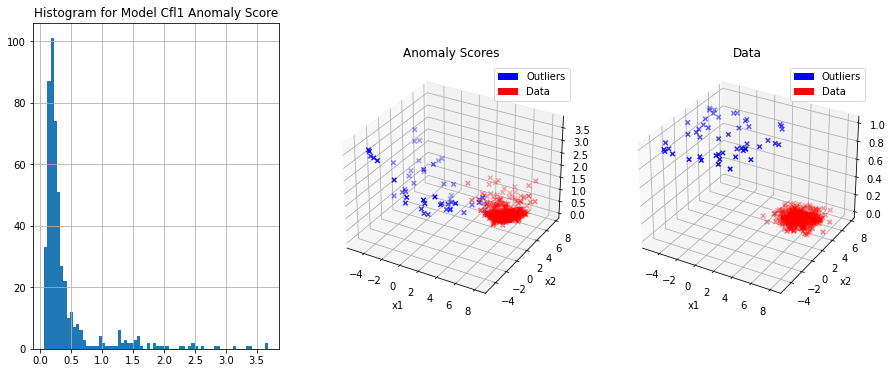

In [110]:
y_train_scores = clf.decision_scores_   # get the training scores
y_test_scores = pd.Series(clf.decision_function(X_test))  # get predictions
y_test_color = ["red" if p==0 else "blue" for p in y_test]

from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import


fig = plt.figure(figsize=(15,6))

ax1 = fig.add_subplot(1, 3, 1)
ax1.hist(y_test_scores, bins="auto")
ax1.set_title("Histogram for Model Cfl1 Anomaly Score")
ax1.grid()

ax2 = fig.add_subplot(1, 3, 2, projection='3d')
sp2 = ax2.scatter3D(X_test[:,0], X_test[:,1], y_test_scores, c=y_test_color, marker="x")
ax2.set_title("Anomaly Scores")
ax2.grid()
ax2.set_xlabel("x1")
ax2.set_ylabel("x2")
blue_proxy = plt.Rectangle((0, 0), 1, 1, fc="b")
red_proxy = plt.Rectangle((0, 0), 1, 1, fc="r")
ax2.legend([blue_proxy,red_proxy],['Outliers','Data'])

ax2 = fig.add_subplot(1, 3, 3, projection='3d')
sp2 = ax2.scatter3D(X_test[:,0], X_test[:,1], y_test, c=y_test_color, marker="x")
ax2.set_title("Data")
ax2.grid()
ax2.set_xlabel("x1")
ax2.set_ylabel("x2")
blue_proxy = plt.Rectangle((0, 0), 1, 1, fc="b")
red_proxy = plt.Rectangle((0, 0), 1, 1, fc="r")
ax2.legend([blue_proxy,red_proxy],['Outliers','Data'])

#### Step 3: Present the summary statistics of normal and outlier clusters

In [113]:
# Let's see how many '0's and '1's. We get 452 '0's and 48 '1's.
df_test = pd.DataFrame(X_test)
df_test['score'] = y_test_scores
df_test['cluster'] = np.where(df_test['score']<1, 0, 1)
df_test['cluster'].value_counts()
# Now let's show the summary statistics:
df_test.groupby('cluster').mean()

,0,1,score
cluster,,,
0,4.944010,4.989713,0.264534
1,-0.018724,0.234169,1.857781
